## SETUP AND LOAD DATA

In [1]:
pip install tensorflow opencv-python matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, F1Score

### Data Cleaning

In [3]:
import cv2
import imghdr

C:\Users\Kemci\AppData\Local\Temp\ipykernel_12808\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'dataset'

In [5]:
os.listdir(data_dir)

['benign', 'malignant']

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print (image)

benign (1).png
benign (10).png
benign (100).png
benign (101).png
benign (102).png
benign (103).png
benign (104).png
benign (105).png
benign (106).png
benign (107).png
benign (108).png
benign (109).png
benign (11).png
benign (110).png
benign (111).png
benign (112).png
benign (113).png
benign (114).png
benign (115).png
benign (116).png
benign (117).png
benign (118).png
benign (119).png
benign (12).png
benign (120).png
benign (121).png
benign (122).png
benign (123).png
benign (124).png
benign (125).png
benign (126).png
benign (127).png
benign (128).png
benign (129).png
benign (13).png
benign (130).png
benign (131).png
benign (132).png
benign (133).png
benign (134).png
benign (135).png
benign (136).png
benign (137).png
benign (138).png
benign (139).png
benign (14).png
benign (140).png
benign (141).png
benign (142).png
benign (143).png
benign (144).png
benign (145).png
benign (146).png
benign (147).png
benign (148).png
benign (149).png
benign (15).png
benign (150).png
benign (151).png
benig

In [9]:
img = cv2.imread(os.path.join('dataset', 'benign', 'benign (43).png'), cv2.IMREAD_GRAYSCALE)
print(img)

[[131 132 135 ... 155 148 142]
 [143 141 138 ... 175 174 168]
 [159 155 148 ... 174 178 173]
 ...
 [  6  10  13 ...   8  10  13]
 [  3   7   9 ...   8   8  11]
 [  8   9  11 ...  10  14  16]]


In [10]:
img.shape

(495, 554)

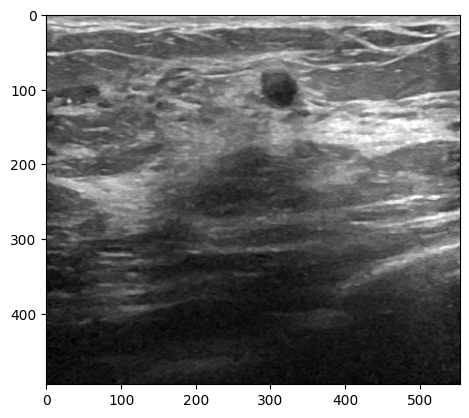

In [11]:
plt.imshow(img, cmap="gray")
##plt.subplots_adjust(left=0.1, right=0.6, top=0.6, bottom=0.1)  # Adjust padding values
plt.show()



In [12]:
for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print("Image not in ext list {}".format(image_path))
            os.remove(image_path)
    except Exception as e:
        print("Issue with image {}".format(image_path))

#### Load Data

In [13]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('dataset', color_mode = "grayscale")

Found 647 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000017419C46480>)

In [18]:
# Get another batch from the iterator
batch = data_iterator.next()

In [19]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 1)

In [20]:
# Class 1 = Malignant?
# Class 0 = Benign?
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

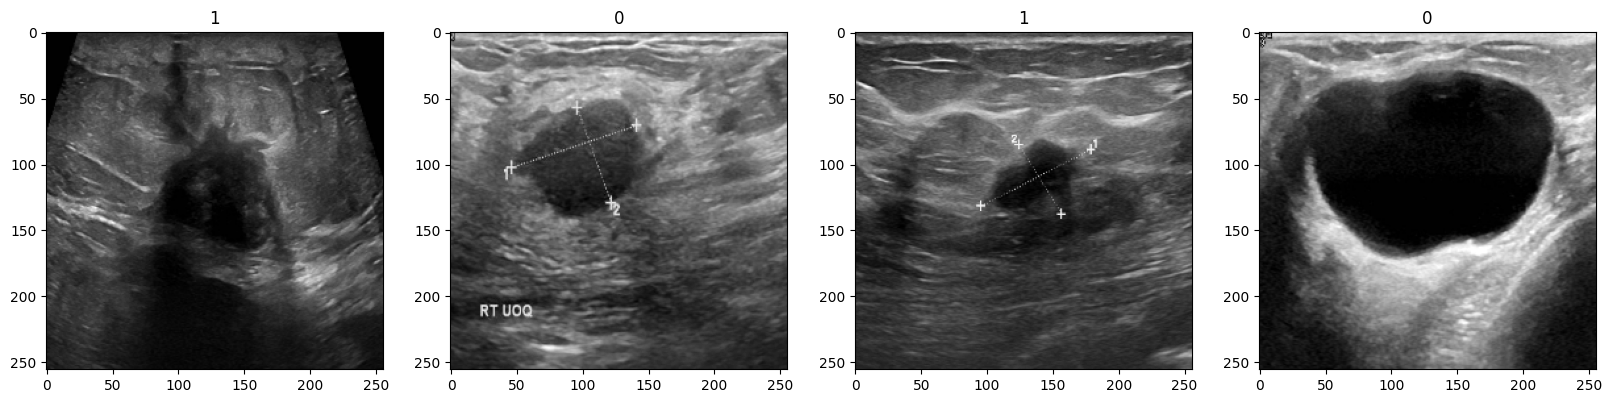

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int), cmap = 'gray')
    ax[idx].title.set_text(batch[1][idx])

## PREPROCESS DATA

### Scale Data

In [22]:
data = data.map(lambda x,y: (x / 255.0, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

### Split Data

In [26]:
len(data_dir)

7

In [27]:
train_size = int(len(data_dir)*.7)
val_size = int(len(data_dir)*.2)+1
test_size = int(len(data_dir)*.1)+1

In [28]:
train_size+val_size+test_size

7

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DEEP MODEL

### Build Deep Learning Model

In [30]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,1)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\Kemci\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model.add(Conv2D(16, (3, 3), strides=1, activation="relu", input_shape=(256, 256, 1), groups=1))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3, 3), strides=1, activation="relu", groups=1))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3, 3), strides=1, activation="relu", groups=1))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

In [34]:
##tf.metrics.Precision(), tf.metrics.Recall(), tf.keras.metrics.F1Score()

In [35]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy",'precision', 'recall'])


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,337 (14.10 MB)

 Trainable params: 3,696,337 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [37]:
logdir = "logs"

In [38]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [39]:
history = model.fit(train, epochs = 200, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7250 - loss: 0.7318 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6406 - val_loss: 0.6583 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7500 - loss: 0.6270 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5120 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6927 - loss: 0.6056 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8281 - val_loss: 0.4526 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6750 - loss: 0.6032 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5955 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6708 - loss: 0.5862 - precision: 0.0000e+00 - rec

In [40]:
history.history

{'accuracy': [0.6953125,
  0.734375,
  0.671875,
  0.703125,
  0.6796875,
  0.6640625,
  0.7109375,
  0.7578125,
  0.78125,
  0.7734375,
  0.7578125,
  0.7734375,
  0.7578125,
  0.875,
  0.828125,
  0.890625,
  0.8828125,
  0.8671875,
  0.859375,
  0.890625,
  0.8828125,
  0.9453125,
  0.9453125,
  0.90625,
  0.8984375,
  0.9375,
  0.8984375,
  0.9453125,
  0.9375,
  0.9765625,
  0.9765625,
  0.9609375,
  1.0,
  0.984375,
  0.984375,
  0.9765625,
  0.984375,
  0.984375,
  0.9921875,
  0.9921875,
  1.0,
  0.9921875,
  0.9921875,
  0.984375,
  0.9921875,
  0.9921875,
  0.9921875,
  0.984375,
  0.9921875,
  1.0,
  0.9765625,
  0.984375,
  0.9921875,
  0.984375,
  1.0,
  0.96875,
  0.96875,
  0.96875,
  0.9921875,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  0.9921875,
  0.9921875,
  0.9921875,
  0.984375,
  0.9765625,
  0.9609375,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0,
  0.9765625,
  1.0,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9

### Plot Performance

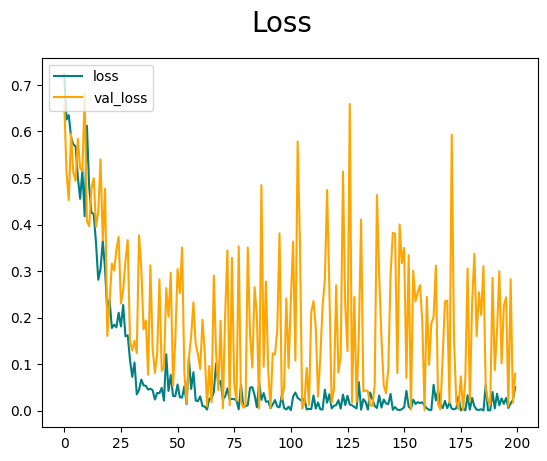

In [41]:
fig = plt.figure()
plt.plot(history.history["loss"], color = "teal", label = "loss")
plt.plot(history.history["val_loss"], color = "orange", label = "val_loss")
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

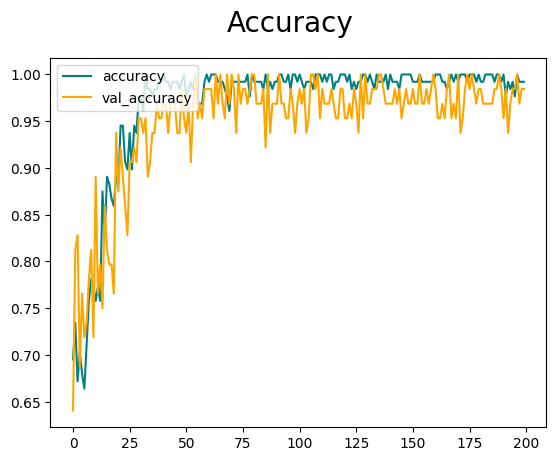

In [42]:
fig = plt.figure()
plt.plot(history.history["accuracy"], color = "teal", label = "accuracy")
plt.plot(history.history["val_accuracy"], color = "orange", label = "val_accuracy")
fig.suptitle("Accuracy", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

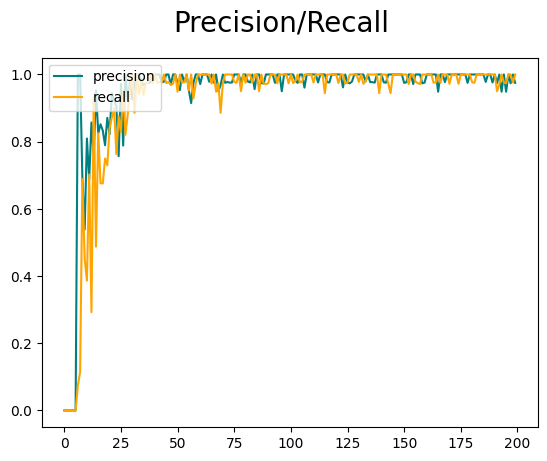

In [43]:
fig = plt.figure()
plt.plot(history.history["precision"], color = "teal", label = "precision")
plt.plot(history.history["recall"], color = "orange", label = "recall")
fig.suptitle("Precision/Recall", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

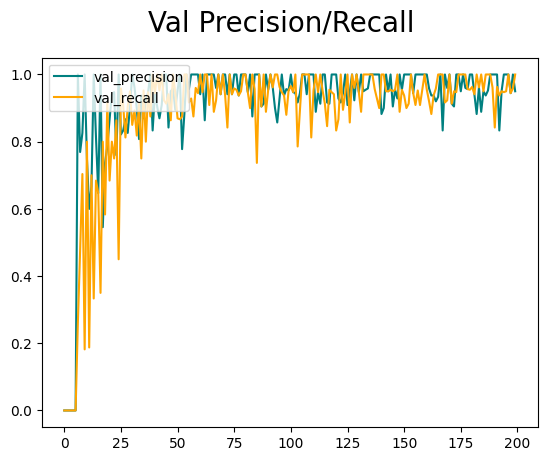

In [44]:
fig = plt.figure()
plt.plot(history.history["val_precision"], color = "teal", label = "val_precision")
plt.plot(history.history["val_recall"], color = "orange", label = "val_recall")
fig.suptitle("Val Precision/Recall", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


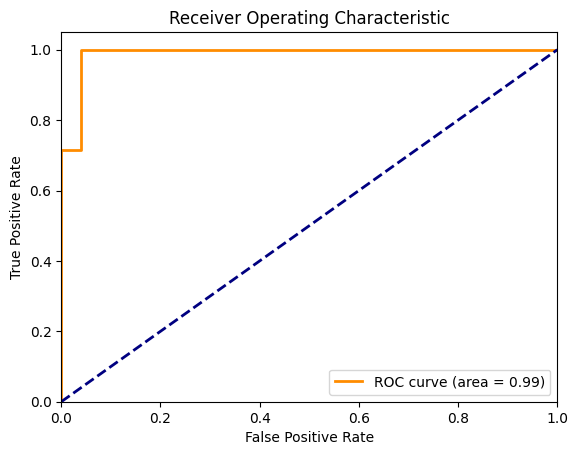

In [45]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded and split into train, val, and test sets as in your initial code

# Get predictions and true labels for the test set
y_true = []
y_pred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred.extend(model.predict(X))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## EVALUATE PERFORMANCE

### Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
len(batch)

2

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [50]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9230769276618958, Recall:0.9230769276618958, Accuracy:0.9375


### Test

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [52]:
cv2.imread??

Docstring:
imread(filename[, flags]) -> retval
.   @brief Loads an image from a file.
.   
.   @anchor imread
.   
.   The function imread loads an image from the specified file and returns it. If the image cannot be
.   read (because of missing file, improper permissions, unsupported or invalid format), the function
.   returns an empty matrix ( Mat::data==NULL ).
.   
.   Currently, the following file formats are supported:
.   
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   AVIF - \*.avif (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \*.ras (always supported)
.   -   TIFF file

In [53]:
img = cv2.imread('malignant (32).png')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #Converting test image to grayscale
plt.imshow(img_gray, cmap = "gray")
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
img_gray_with_channel = np.expand_dims(img_gray, axis = -1) # Add a channel dimension to the grayscale image tensor

In [ ]:
##resize = cv2.resize(img_gray, (256, 256))

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Read the image using PIL
# img = Image.open('malignant (77).png')

# # Convert the PIL image to a NumPy array
# img_array = np.array(img)

# # Display the image using Matplotlib
# plt.imshow(img_array, cmap='gray')
# plt.show()

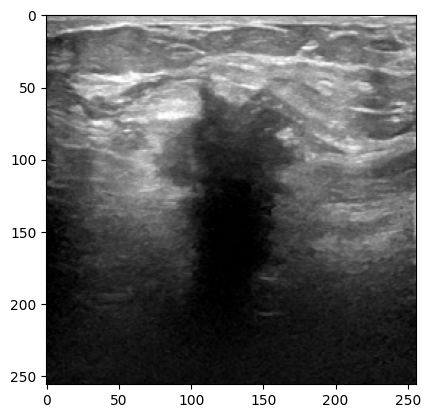

In [ ]:
resize = tf.image.resize(img_gray_with_channel, (256,256))
plt.imshow(resize.numpy().squeeze().astype(int), cmap = 'gray') # Squeeze to remove the channel dimension for display
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 1])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 1)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [ ]:
yhat

array([[0.99984515]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print (f"Predicted class is Malignant")
else:
    print (f"Predicted class is Benign")

Predicted class is Malignant


In [ ]:
# print(pre.result(), re.result(), acc.result())

In [ ]:
# After evaluating the model's performance
from sklearn.metrics import f1_score

# Get predictions and true labels for the test set
y_true = []
y_pred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred.extend(model.predict(X))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute F1 score
f1 = f1_score(y_true, np.round(y_pred))

print("F1 Score:", f1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
F1 Score: 0.9333333333333333


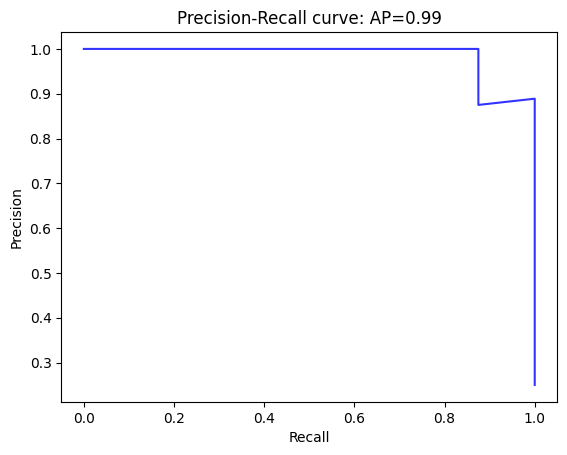

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Compute average precision score
average_precision = average_precision_score(y_true, y_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='b', alpha=0.8)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


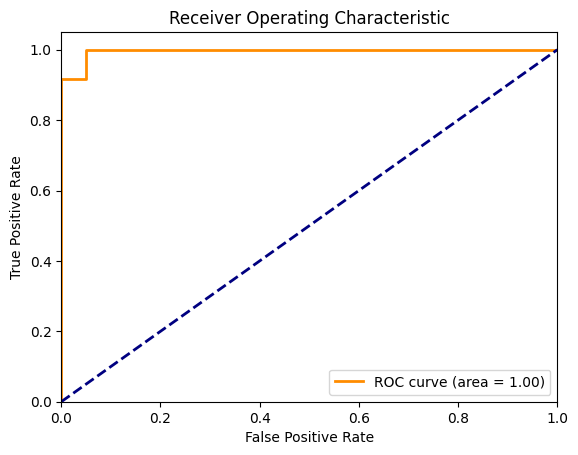

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded and split into train, val, and test sets as in your initial code

# Get predictions and true labels for the test set
y_true = []
y_pred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred.extend(model.predict(X))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


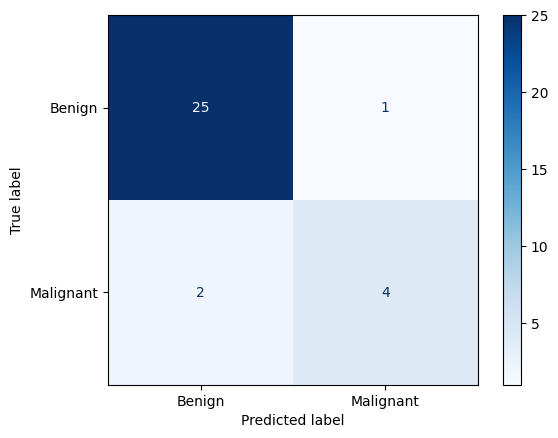

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test dataset
y_true = []
y_pred = []

for images, labels in test:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(predictions).flatten())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


## SAVE

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'malignant_benign_model.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'malignant_benign_model.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [ ]:
if yhatnew > 0.5:
    print (f"Predicted class is Malignant")
else:
    print (f"Predicted class is Benign")

Predicted class is Malignant
